# Prueba mediciones en python

In [103]:
# Al instalar pandas se instala numpy
try:
    import pandas as pd
    import numpy as np
except ImportError:
    from pip._internal import main as pip
    pip(['install', '--user', 'pandas'])
    import pandas as pd
    import numpy as np
    
#Es
try:
    import matplotlib.pyplot as plt
except ImportError:
    from pip._internal import main as pip
    pip(['install', '--user', 'matplotlib'])
    import matplotlib.pyplot as plt

import random
from math import sqrt

###  Generador de letras aleatorias

In [104]:
valor_a = ord('a')
distancia_z_a = ord('z')-ord('a')


def genera_letra():
    import random
    return chr(valor_a+random.randint(0, distancia_z_a))


### Generador de ficheros de entrada

In [105]:

def generate_inputfile(problem_length: int, inputfilename: str="in.txt") -> None:
    input_file = open(inputfilename, 'w')
    prueba = ""
    # Generamos las subcadenas del problema
    for _ in range(3):
        # Generamos cada subcadena con 3 letras de longitud
        for _2 in range(3):
            prueba += genera_letra()
        # Escribimos la subcadena en el fichero de entrada
        input_file.write(prueba+"\n")
        prueba = ""

    for _ in range(problem_length):
        prueba += genera_letra()
    input_file.write(prueba)
    input_file.close()


## Intentando lanzar un programa c++ en python

In [106]:
import time


def tiempo_en_milis():
    return round(time.time() * 1000)


def ejecutar(nombre_entrada: str = "in.txt", nombre_salida: str = "out.txt", problema: str = "it"):
    import subprocess
    import datetime

    fichero_entrada = open(nombre_entrada, "r")
    fichero_salida = open(nombre_salida, "w")
    # Obtener inicio de ejecución

    # tiempo_inicio = time.process_time()
    tiempo_inicio = tiempo_en_milis()
    # Ejecutar proceso
    proc = subprocess.Popen(["./solucion", problema],
                            stdin=fichero_entrada, stdout=fichero_salida)
    proc.wait()
    # Obtener final de ejecución
    # tiempo_final = time.process_time()
    tiempo_final = tiempo_en_milis()

    # Cerrar ficheros de i/o
    fichero_entrada.close()
    fichero_salida.close()

    return tiempo_final-tiempo_inicio


In [107]:

it_out = "iterativa.txt"
dyv_out = "dyv.txt"




def pruebas(nombre_entrada: str = "in.txt", inicio: int = 100,
            final: int = 10000, salto: int = 1) -> pd.DataFrame:
    import subprocess
    df: pd.DataFrame = pd.DataFrame(
        columns=['tamanno', 'it_milis', 'dyv_milis'])

    comp = open("comprobacion.txt", "w")

    proc = subprocess.Popen("make")
    proc.wait()

    for i in range(inicio, final+1, salto):
        tamanno = int(i)
        generate_inputfile(tamanno, nombre_entrada)

        tiempo_it = ejecutar(nombre_entrada, it_out, "it")
        tiempo_dyv = ejecutar(nombre_entrada, dyv_out, "dyv")

        df.loc[len(df)] = [int(tamanno), tiempo_it, tiempo_dyv]
        print(int(tamanno), tiempo_it, tiempo_dyv)
        proc = subprocess.Popen(["diff", it_out, dyv_out], stdout=comp)
        proc.wait()
        df.to_csv("cache.csv")

    comp.close()
    return df


### Función que comprueba si ambas soluciones son iguales
Esta funcion permite que se le proporcione un fichero de entrada, no lo valida de tener un error peta, o pedir que se genere, así como especificar el tamaño del problema. 
Utiliza meld para visualizar las diferencias.

In [108]:

def iguales(inputfile: str = "in.txt", tamanno:int = 10000, generar:bool = False) -> pd.DataFrame:
    import subprocess
    if generar:        
        generate_inputfile(tamanno, inputfile)
        
    ejecutar(input_filename=inputfile, problema="it", output_filename="iterativa.txt")    
    ejecutar(input_filename=inputfile, problema="dyv", output_filename="divideyvenceras.txt")
    # Meld compara salidas de forma grafica
    proc = subprocess.Popen(["meld", "iterativa.txt", "divideyvenceras.txt"])


In [ ]:
df = pruebas("in.txt",10**0,10**4,10)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_1_to_9999.csv")

make: 'solucion' is up to date.
1 5 6
2 4 4
3 3 4
4 4 4
5 7 6
6 3 3
7 3 5
8 6 3
9 3 4
10 4 4
11 4 4
12 3 3
13 3 3
14 3 3
15 3 4
16 4 4
17 3 3
18 4 3
19 4 4
20 4 3
21 4 3
22 4 4
23 4 3
24 3 4
25 3 3
26 3 3
27 3 4
28 3 4
29 4 3
30 3 3
31 3 2
32 3 3
33 4 3
34 3 4
35 3 3
36 3 3
37 3 3
38 3 3
39 4 3
40 4 2
41 6 5
42 4 6
43 4 5
44 4 4
45 3 3
46 3 3
47 3 2
48 3 3
49 4 4
50 3 4
51 3 3
52 6 2
53 3 3
54 3 4
55 5 4
56 4 3
57 3 3
58 4 3
59 4 4
60 5 4
61 4 5
62 6 6
63 3 6
64 4 4
65 3 3
66 3 4
67 3 3
68 2 3
69 3 3
70 3 3
71 3 4
72 3 3
73 4 3
74 3 3
75 3 4
76 3 3
77 3 3
78 3 6
79 3 4
80 3 2
81 3 5
82 3 4
83 3 3
84 3 3
85 4 2
86 3 3
87 3 3
88 3 3
89 3 3
90 3 4
91 4 5
92 5 5
93 3 2
94 4 3
95 4 3
96 3 3
97 3 3
98 3 2
99 3 3
100 3 3
101 5 3
102 4 4
103 3 3
104 5 4
105 4 4
106 4 3
107 3 4
108 3 3
109 3 3
110 3 3
111 3 3
112 3 5
113 3 3
114 3 3
115 3 4
116 4 4
117 4 3
118 3 4
119 6 6
120 5 4
121 5 6
122 5 5
123 4 4
124 5 5
125 5 3
126 4 4
127 5 4
128 4 4
129 4 4
130 5 3
131 3 3
132 3 3
133 3 5
134 4 5
135 

KeyboardInterrupt: 

In [111]:
df = pruebas("in.txt",10**4,10**6,10**3)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_10e4_to_10e6-1.csv")

make: 'solucion' is up to date.
10000 7 11
11000 9 12
12000 8 12
13000 5 13
14000 7 21
15000 14 17
16000 6 17
17000 6 18
18000 7 19
19000 7 19
20000 6 21
21000 7 22
22000 11 25
23000 7 26
24000 17 30
25000 18 44
26000 8 45
27000 8 54
28000 8 78
29000 8 64
30000 8 68
31000 16 98
32000 17 86
33000 9 90
34000 9 88
35000 9 101
36000 9 98
37000 10 109
38000 9 99
39000 9 104
40000 9 108
41000 9 129
42000 11 154
43000 10 131
44000 26 132
45000 12 172
46000 10 151
47000 30 151
48000 12 194
49000 29 159
50000 29 238
51000 12 259
52000 30 300
53000 13 344
54000 31 372
55000 12 377
56000 32 393
57000 14 390
58000 14 405
59000 13 421
60000 13 433
61000 14 448
62000 20 458
63000 33 465
64000 14 489
65000 13 493
66000 36 522
67000 21 598
68000 15 634
69000 15 675
70000 39 711
71000 15 723
72000 38 748
73000 33 767
74000 18 790
75000 38 778
76000 16 810
77000 17 886
78000 17 885
79000 38 914
80000 17 951
81000 23 919
82000 32 978
83000 18 968
84000 37 1055
85000 17 1026
86000 43 1096
87000 18 1085
88

In [ ]:
df = pruebas("in.txt",10**6,10**7,10**3)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_10e6_to_10e7.csv")

make: 'solucion' is up to date.


KeyboardInterrupt: 

In [ ]:
df = pruebas("in.txt",10**7,10**8,10**3)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_10e7_to_10e8.csv")

In [ ]:
df = pruebas("in.txt",10**8,10**9,10**4)
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas_10e8_to_10e9.csv")

In [ ]:
df.set_index('tamanno',inplace=True)
df.to_csv("pruebas1.csv")

KeyError: "None of ['tamanno'] are in the columns"

In [ ]:
df

,it_milis,dyv_milis
tamanno,,
10.0,1.128661,0.985848
1010.0,1.039746,0.997440
2010.0,1.383340,1.175374
3010.0,1.207123,1.148296
4010.0,3.655709,1.116710
5010.0,1.136397,1.424107
6010.0,1.221863,1.049780
7010.0,1.182373,1.033973
8010.0,1.132325,1.114243


<Axes: xlabel='tamanno'>

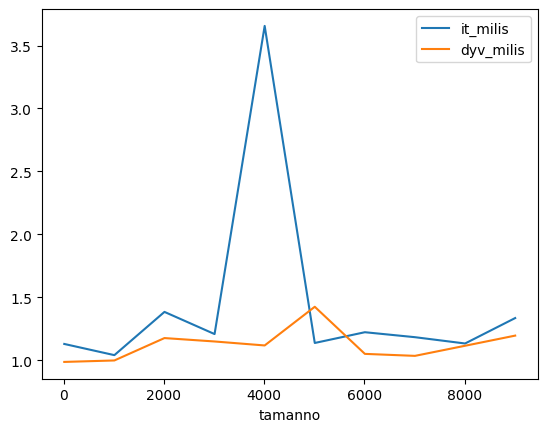

In [ ]:
df.plot()